<a href="https://colab.research.google.com/github/Juliadambros/Resultados-Sistema-de-Recomendacao/blob/main/Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métodos de Exibição dos Resultados do Sistema de Recomendação de Filmes**

Ler a planilha do Google Sheets

In [1]:
import pandas as pd

# ID da planilha
sheet_id = "1lAsBwiDNLFETgs17a06TUMbpEpvc97wfi0BetUFy5Ko"

# URL para exportar como CSV
sheet_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

df = pd.read_csv(sheet_url)
df.head()



,Unnamed: 0,SVD,Unnamed: 2,SVD Grid,Unnamed: 4,NFM,Unnamed: 6,NFM Grid,Unnamed: 8
0,Rodada,Nome,Nota,Nome,Nota,Nome,Nota,Nome,Nota
1,1,A Close Shave (1995),4.46,Schindler's List (1993),4.73,Jackie Brown (1997),5,Some Folks Call It a Sling Blade (1993),4.45
2,1,The Shawshank Redemption (1994),4.8,Pather Panchali (1955),4.71,Dr. Strangelove or: How I Learned to Stop Worr...,5,Beautiful Thing (1996),4.42
3,1,One Flew Over the Cuckoo's Nest (1975),4.71,The Shawshank Redemption (1994),4.66,Amistad (1997),5,It's a Wonderful Life (1946),4.41
4,1,Schindler's List (1993),4.67,One Flew Over the Cuckoo's Nest (1975),4.63,A Close Shave (1995),5,Sense and Sensibility (1995),4.4


Normalizar os dados para análise

In [2]:
# Criar lista para armazenar dados longos
data_long = []

# Mapear colunas
metodos = {
    "SVD": ("SVD", "Unnamed: 2"),
    "SVD Grid": ("SVD Grid", "Unnamed: 4"),
    "NMF": ("NFM", "Unnamed: 6"),
    "NMF Grid": ("NFM Grid", "Unnamed: 8")
}

# Iterar sobre linhas da planilha
rodada = None
for _, row in df.iterrows():
    if row["Unnamed: 0"] != "Rodada" and not pd.isna(row["Unnamed: 0"]):
        rodada = int(row["Unnamed: 0"])
    if rodada is None:
        continue

    for metodo, (col_nome, col_nota) in metodos.items():
        nome_filme = row[col_nome]
        nota = row[col_nota]
        if nome_filme != "Nome" and not pd.isna(nome_filme):
            data_long.append({
                "Rodada": rodada,
                "Metodo": metodo,
                "Filme": nome_filme,
                "Nota": float(nota)
            })

df_long = pd.DataFrame(data_long)
df_long.head()


,Rodada,Metodo,Filme,Nota
0,1,SVD,A Close Shave (1995),4.46
1,1,SVD Grid,Schindler's List (1993),4.73
2,1,NMF,Jackie Brown (1997),5.00
3,1,NMF Grid,Some Folks Call It a Sling Blade (1993),4.45
4,1,SVD,The Shawshank Redemption (1994),4.80


Heatmap de frequência

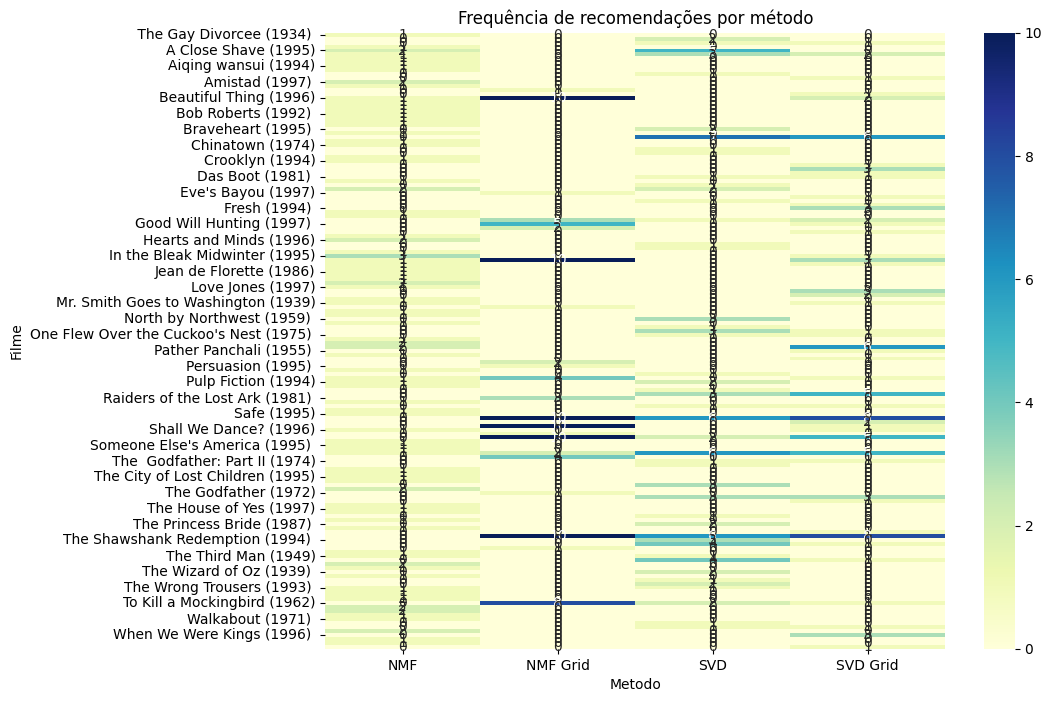

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar frequência por método e filme
freq = df_long.groupby(["Metodo", "Filme"]).size().reset_index(name="Frequencia")
pivot_freq = freq.pivot(index="Filme", columns="Metodo", values="Frequencia").fillna(0)

plt.figure(figsize=(10,8))
sns.heatmap(pivot_freq, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Frequência de recomendações por método")
plt.show()


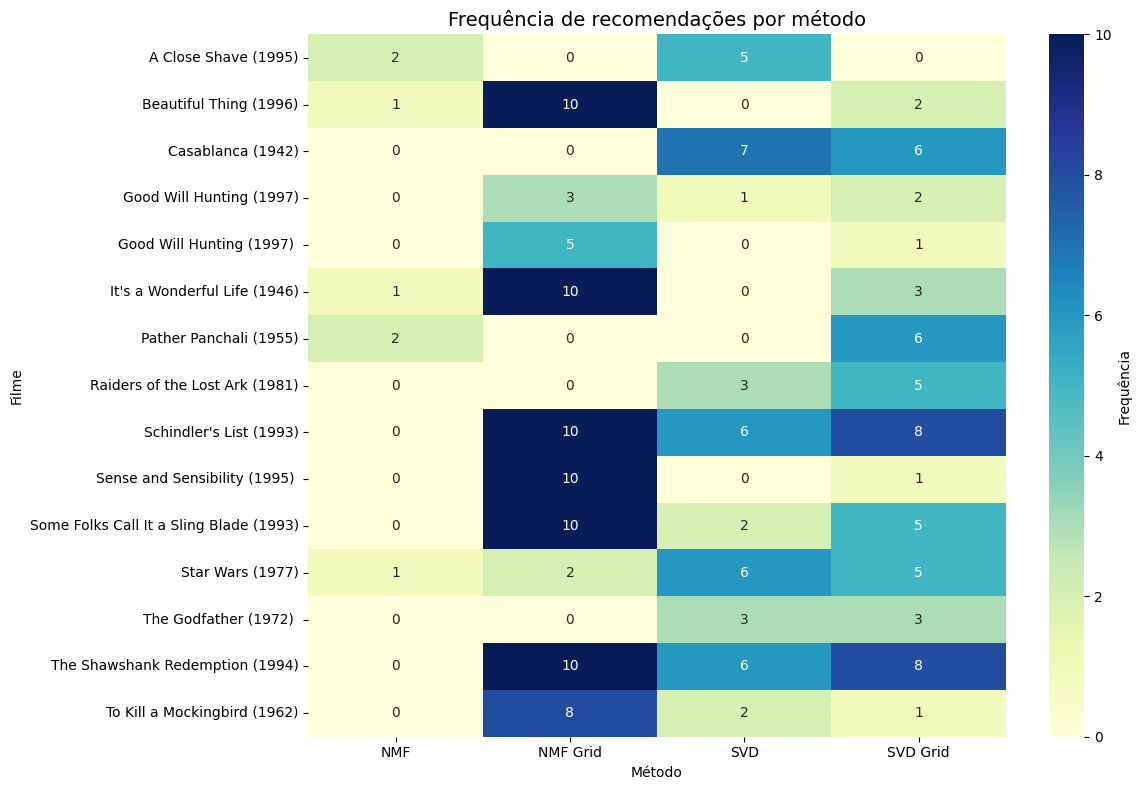

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

vmax_auto = np.percentile(df_pivot.values, 95)

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_pivot,
    cmap="YlGnBu",
    annot=True,
    cbar_kws={"label": "Frequência"},
    vmax=vmax_auto
)

plt.title("Frequência de recomendações por método", fontsize=14)
plt.xlabel("Método")
plt.ylabel("Filme")
plt.tight_layout()
plt.show()


Gráfico de barras empilhadas

<Figure size 1200x600 with 0 Axes>

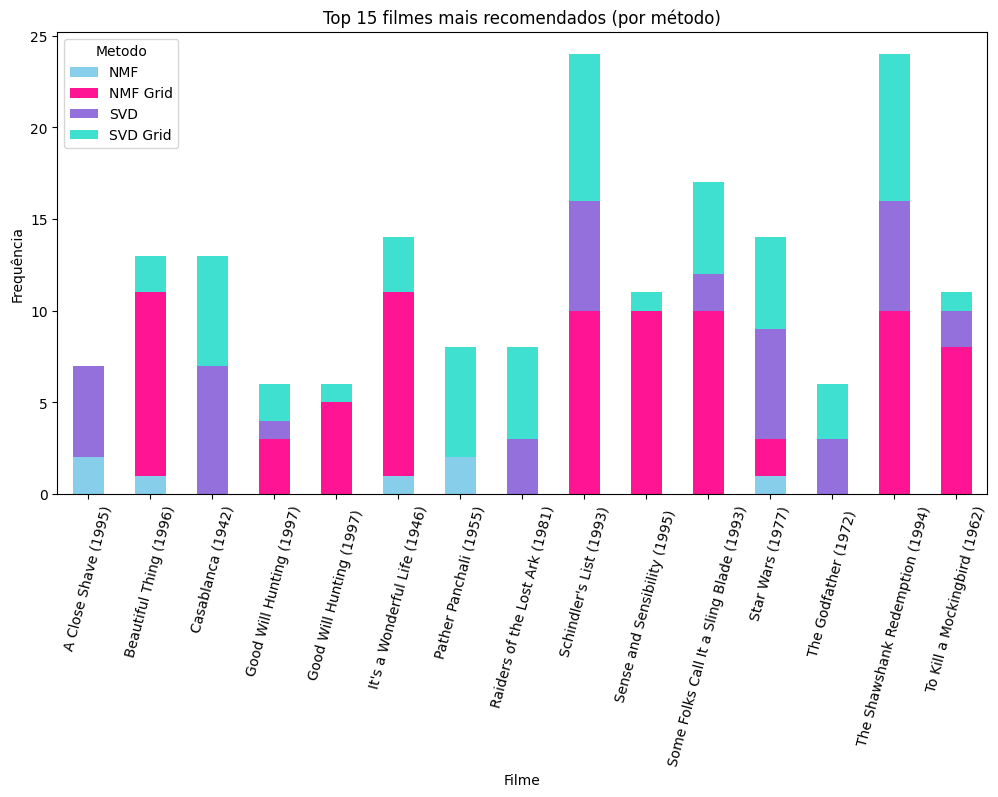

In [24]:
cores = ['skyblue', 'deeppink', 'mediumpurple', '#40E0D0']


plt.figure(figsize=(12,6))
df_pivot = df_top.pivot(index="Filme", columns="Metodo", values="Frequencia").fillna(0)

df_pivot.plot(kind="bar", stacked=True, figsize=(12,6), color=cores)

plt.title("Top 15 filmes mais recomendados (por método)")
plt.ylabel("Frequência")
plt.xticks(rotation=75)
plt.show()



Word Cloud

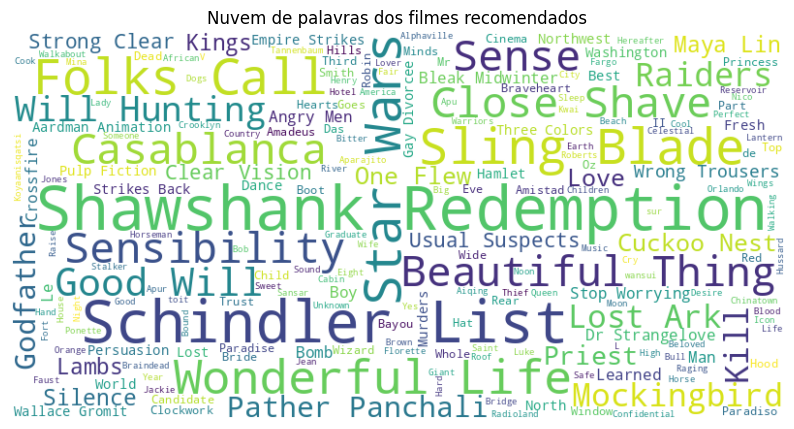

In [5]:
from wordcloud import WordCloud

# Contar frequência total
texto = " ".join(df_long["Filme"])
wc = WordCloud(width=800, height=400, background_color="white").generate(texto)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de palavras dos filmes recomendados")
plt.show()


UpSet Plot (interseção de métodos)

/usr/local/lib/python3.11/dist-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

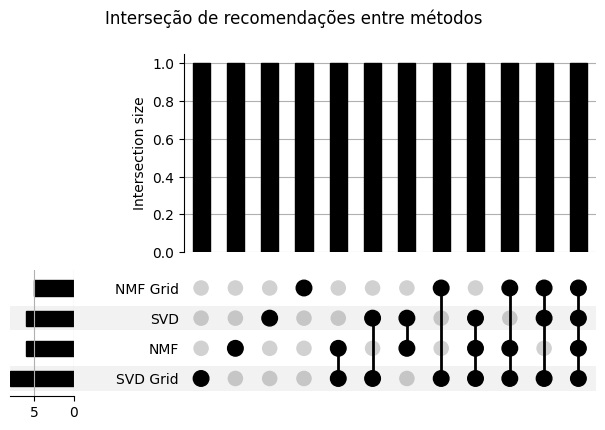

In [7]:
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# Exemplo de construção: cada linha é um conjunto de métodos que recomendou o filme
dados_upset = []
for filme in df_long["Filme"].unique():
    metodos_que_recomendam = df_long[df_long["Filme"] == filme]["Metodo"].unique().tolist()
    dados_upset.append(metodos_que_recomendam)

# Converter para formato do UpSetPlot, removendo duplicatas com contagem
upset_data = from_memberships(dados_upset).groupby(level=list(range(len(upset_data.index.levels)))).sum()

# Plot
UpSet(upset_data, subset_size="count").plot()
plt.suptitle("Interseção de recomendações entre métodos")
plt.show()



Estabilidade (Matriz de Jaccard): Valores próximos de 1.0 = as recomendações são quase sempre as mesmas de uma rodada para outra (muito estável).

Valores próximos de 0.0 = recomendações mudam bastante entre rodadas (menos estável).

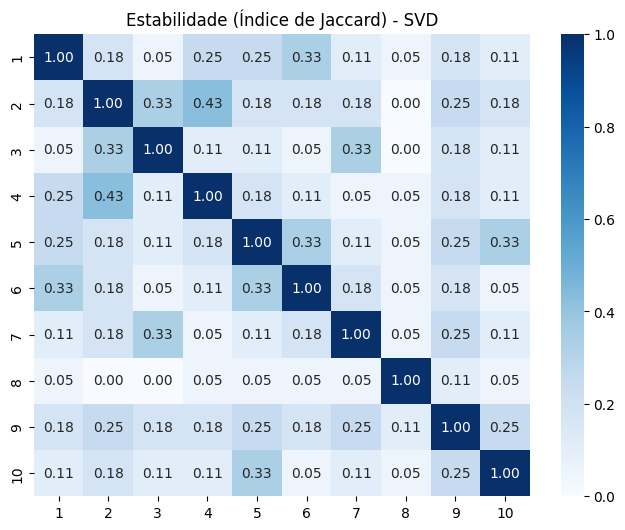

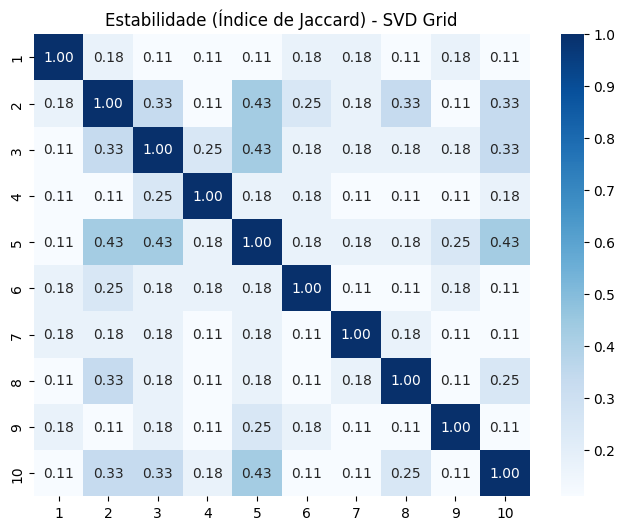

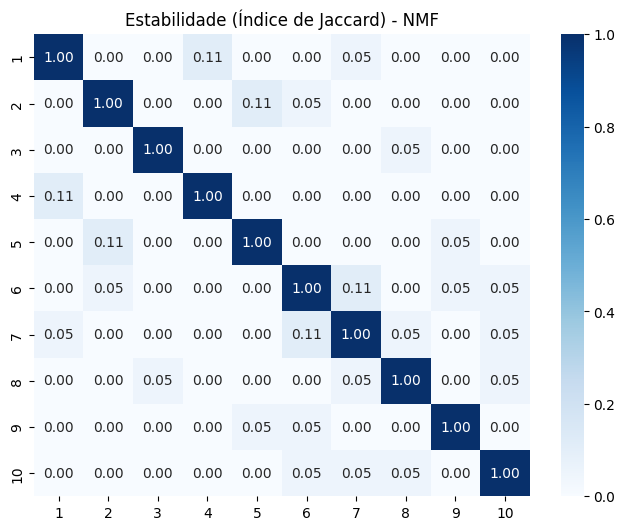

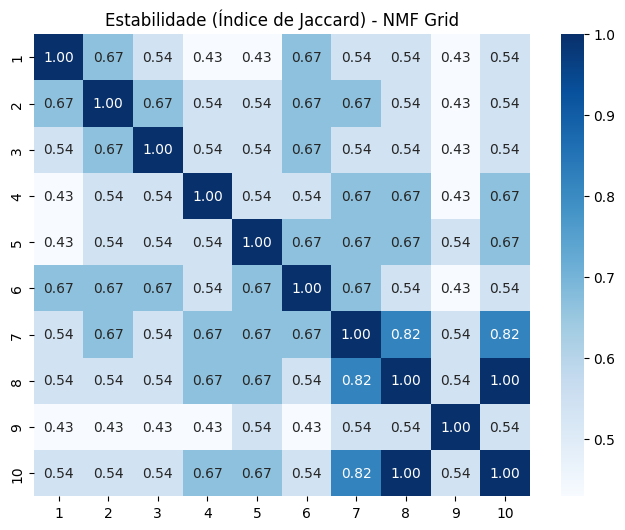

In [8]:
import itertools
import numpy as np

# Criar dicionário {Método: {Rodada: set(filmes)}}
rodadas_dict = {}
for metodo in df_long["Metodo"].unique():
    rodadas_dict[metodo] = {}
    for rodada in df_long["Rodada"].unique():
        filmes_rodada = set(df_long[(df_long["Metodo"] == metodo) & (df_long["Rodada"] == rodada)]["Filme"])
        rodadas_dict[metodo][rodada] = filmes_rodada

# Calcular matriz de similaridade para cada método
for metodo, rodadas_filmes in rodadas_dict.items():
    rodadas_list = sorted(rodadas_filmes.keys())
    matriz = np.zeros((len(rodadas_list), len(rodadas_list)))

    for i, r1 in enumerate(rodadas_list):
        for j, r2 in enumerate(rodadas_list):
            intersecao = len(rodadas_filmes[r1] & rodadas_filmes[r2])
            uniao = len(rodadas_filmes[r1] | rodadas_filmes[r2])
            matriz[i, j] = intersecao / uniao if uniao > 0 else 0

    # Plot heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(matriz, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=rodadas_list, yticklabels=rodadas_list)
    plt.title(f"Estabilidade (Índice de Jaccard) - {metodo}")
    plt.show()


Comparativo de estabilidade média entre métodos

/tmp/ipython-input-3079343844.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_estabilidade, x="Metodo", y="Jaccard Médio", palette="viridis")


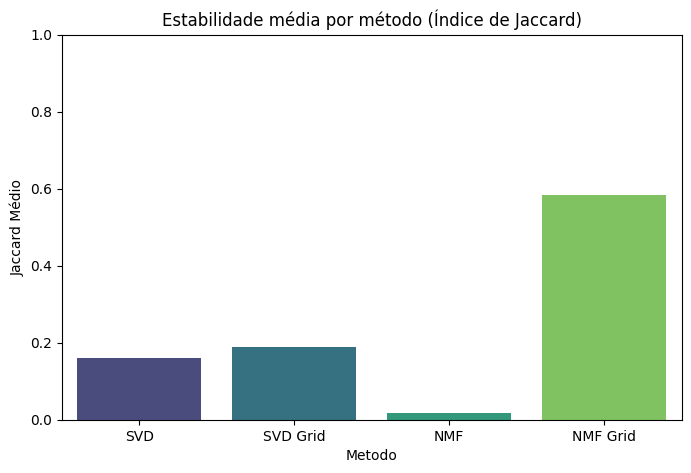

In [28]:
estabilidade_media = []

for metodo, rodadas_filmes in rodadas_dict.items():
    rodadas_list = sorted(rodadas_filmes.keys())
    valores_jaccard = []

    for r1, r2 in itertools.combinations(rodadas_list, 2):
        intersecao = len(rodadas_filmes[r1] & rodadas_filmes[r2])
        uniao = len(rodadas_filmes[r1] | rodadas_filmes[r2])
        jaccard = intersecao / uniao if uniao > 0 else 0
        valores_jaccard.append(jaccard)

    estabilidade_media.append({
        "Metodo": metodo,
        "Jaccard Médio": np.mean(valores_jaccard)
    })

df_estabilidade = pd.DataFrame(estabilidade_media)

plt.figure(figsize=(8,5))
sns.barplot(data=df_estabilidade, x="Metodo", y="Jaccard Médio", palette="viridis")
plt.ylim(0, 1)
plt.title("Estabilidade média por método (Índice de Jaccard)")
plt.ylabel("Jaccard Médio")
plt.show()
